# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
dataset = pd.read_csv('fraudTrain.csv')


# Data cleaning

In [3]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [4]:
dataset['is_fraud'].value_counts()

0.0    809003
1.0      4752
Name: is_fraud, dtype: int64

In [5]:
legit = dataset[dataset.is_fraud==0]
fraud = dataset[dataset.is_fraud==1]

# Making a new dataset

In [6]:
legit_new = legit.sample(n = 7506)
dataset_new = pd.concat([legit_new, fraud], axis = 0)

In [7]:
dataset_new['is_fraud'].value_counts()

1.0    4752
0.0    4432
Name: is_fraud, dtype: int64

# Comaprision between fraud and legit transactions

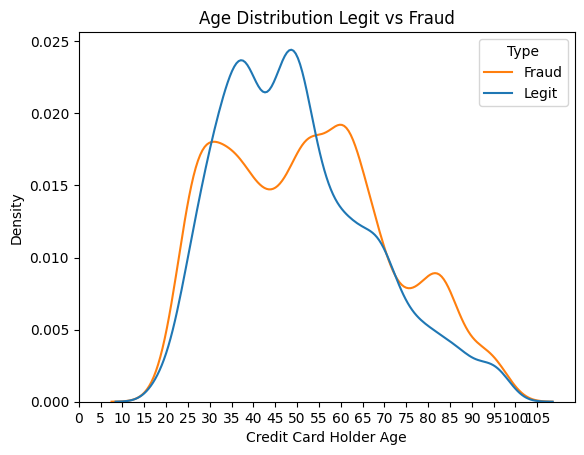

In [8]:
import datetime as dt
import seaborn as sns
dataset_new['age'] = dt.date.today().year-pd.to_datetime(dataset['dob']).dt.year
ax = sns.kdeplot(x = 'age', data = dataset_new, hue = 'is_fraud', common_norm = False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution Legit vs Fraud')
plt.legend(title = 'Type', labels = ['Fraud', 'Legit'])

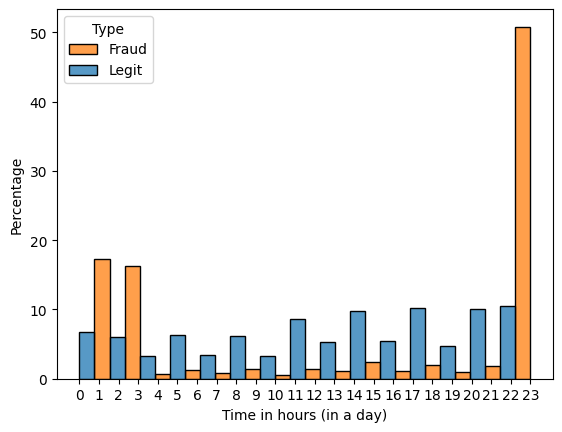

In [9]:
dataset_new['hour'] = pd.to_datetime(dataset['trans_date_trans_time']).dt.hour
ax = sns.histplot(x = 'hour', data = dataset_new, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('Time in hours (in a day)')
ax.set_ylabel('Percentage')
plt.xticks(np.arange(0,24,1))
plt.legend(title = 'Type', labels = ['Fraud', 'Legit'])

<ipython-input-10-9ece06063f70>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"])


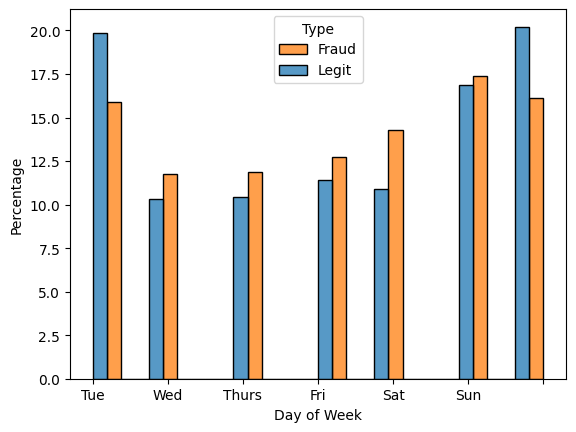

In [10]:
dataset_new['day'] = pd.to_datetime(dataset['trans_date_trans_time']).dt.dayofweek
ax = sns.histplot(x = 'day', data = dataset_new, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Percentage')
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.legend(title = 'Type', labels = ['Fraud', 'Legit'])

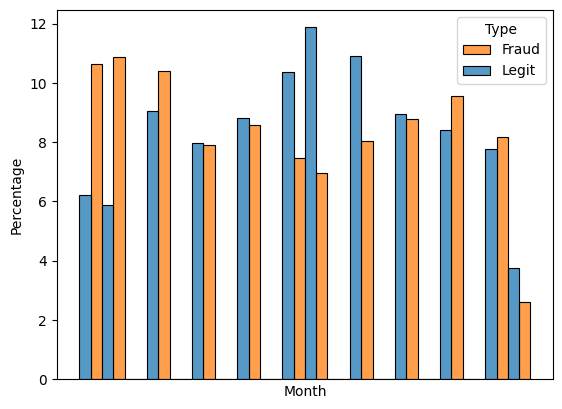

In [11]:
dataset_new['month'] = pd.to_datetime(dataset['trans_date_trans_time']).dt.month
ax = sns.histplot(x = 'month', data = dataset_new, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage')
plt.xticks(np.arange(1,1,1))

plt.legend(title = 'Type', labels = ['Fraud', 'Legit'])

# Splitting the dataset

In [12]:
train = dataset_new[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud']]
train = pd.get_dummies(train, drop_first = True)
X_train = train.drop("is_fraud", axis = 'columns').values
y_train = train["is_fraud"].values

In [ ]:
dataset_test = pd.read_csv('fraudTest.csv')
dataset_test['age'] = dt.date.today().year-pd.to_datetime(dataset_test['dob']).dt.year
dataset_new['hour'] = pd.to_datetime(dataset_test['trans_date_trans_time']).dt.hour
dataset_new['day'] = pd.to_datetime(dataset_test['trans_date_trans_time']).dt.dayofweek
dataset_new['month'] = pd.to_datetime(dataset_test['trans_date_trans_time']).dt.month
#dataset_test = dataset_test[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud']]
dataset_test = pd.get_dummies(dataset_test, drop_first = True)
X_test = dataset_test.drop("is_fraud", axis = 'columns').values
y_test = dataset_test["is_fraud"].values


# Training the model

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
predicted = model.predict(X_test)
print("Classification Report: - ", classification_report(y_test, predicted))
cm = confusion_matrix(y_true = y_test, y_pred = predicted)
print("Confusion Matrix: - ", cm)
print("Share of Legit in test data", 1-round(y_test.sum()/len(y_test), 4))